## Piedmont Wines Dataset 
178 samples from 3 distinct varieties of red wine: Barolo, Grignolino, and Barbera. Features measure chemical compositions, e.g. alcohol content. Visual properties like "color intensity." <br>


## EDA
The dataset is available from: http://archive.ics.uci.edu/ml/datasets/Wine

## Dataset Information
From the website: "These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it ) 
1) Alcohol 
2) Malic acid 
3) Ash 
4) Alcalinity of ash 
5) Magnesium 
6) Total phenols 
7) Flavanoids 
8) Nonflavanoid phenols 
9) Proanthocyanins 
10)Color intensity 
11)Hue 
12)OD280/OD315 of diluted wines 
13)Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging."



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# read the dataset into a DataFrame
df = pd.read_csv('wine.csv')

In [3]:
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 21.0+ KB


In [5]:
df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Attributes
Note about attributes from the website: Attribute Information:

All attributes are continuous 

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant) 

NOTE: 1st attribute is class identifier (1-3)

## Clustering the wines

In [6]:
# create KMeans clustering model
# specify 3 clusters 
# because there are 3 distinct varieties of wine 
model = KMeans(n_clusters=3)

In [7]:
# Create arrays for the features and the response variable
y = df['class_label'].values
X = df.drop(['class_label', 'class_name'], axis=1).values

In [8]:
labels = model.fit_predict(X)
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


## Cross Tabulation

In [9]:
varieties = df['class_name'].values

In [10]:
label_df = pd.DataFrame({'labels': labels, 'varieties': varieties})
label_df.head()

,labels,varieties
0,1,Barolo
1,1,Barolo
2,1,Barolo
3,1,Barolo
4,2,Barolo


In [11]:
ct = pd.crosstab(label_df['labels'], label_df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


This time, the KMeans clusters don't match up well with the wine varieties.  

## Tranforming features for better clusterings 

The problem is that the wine features have very different variances. The variance of a feature measures the spread of its values. 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


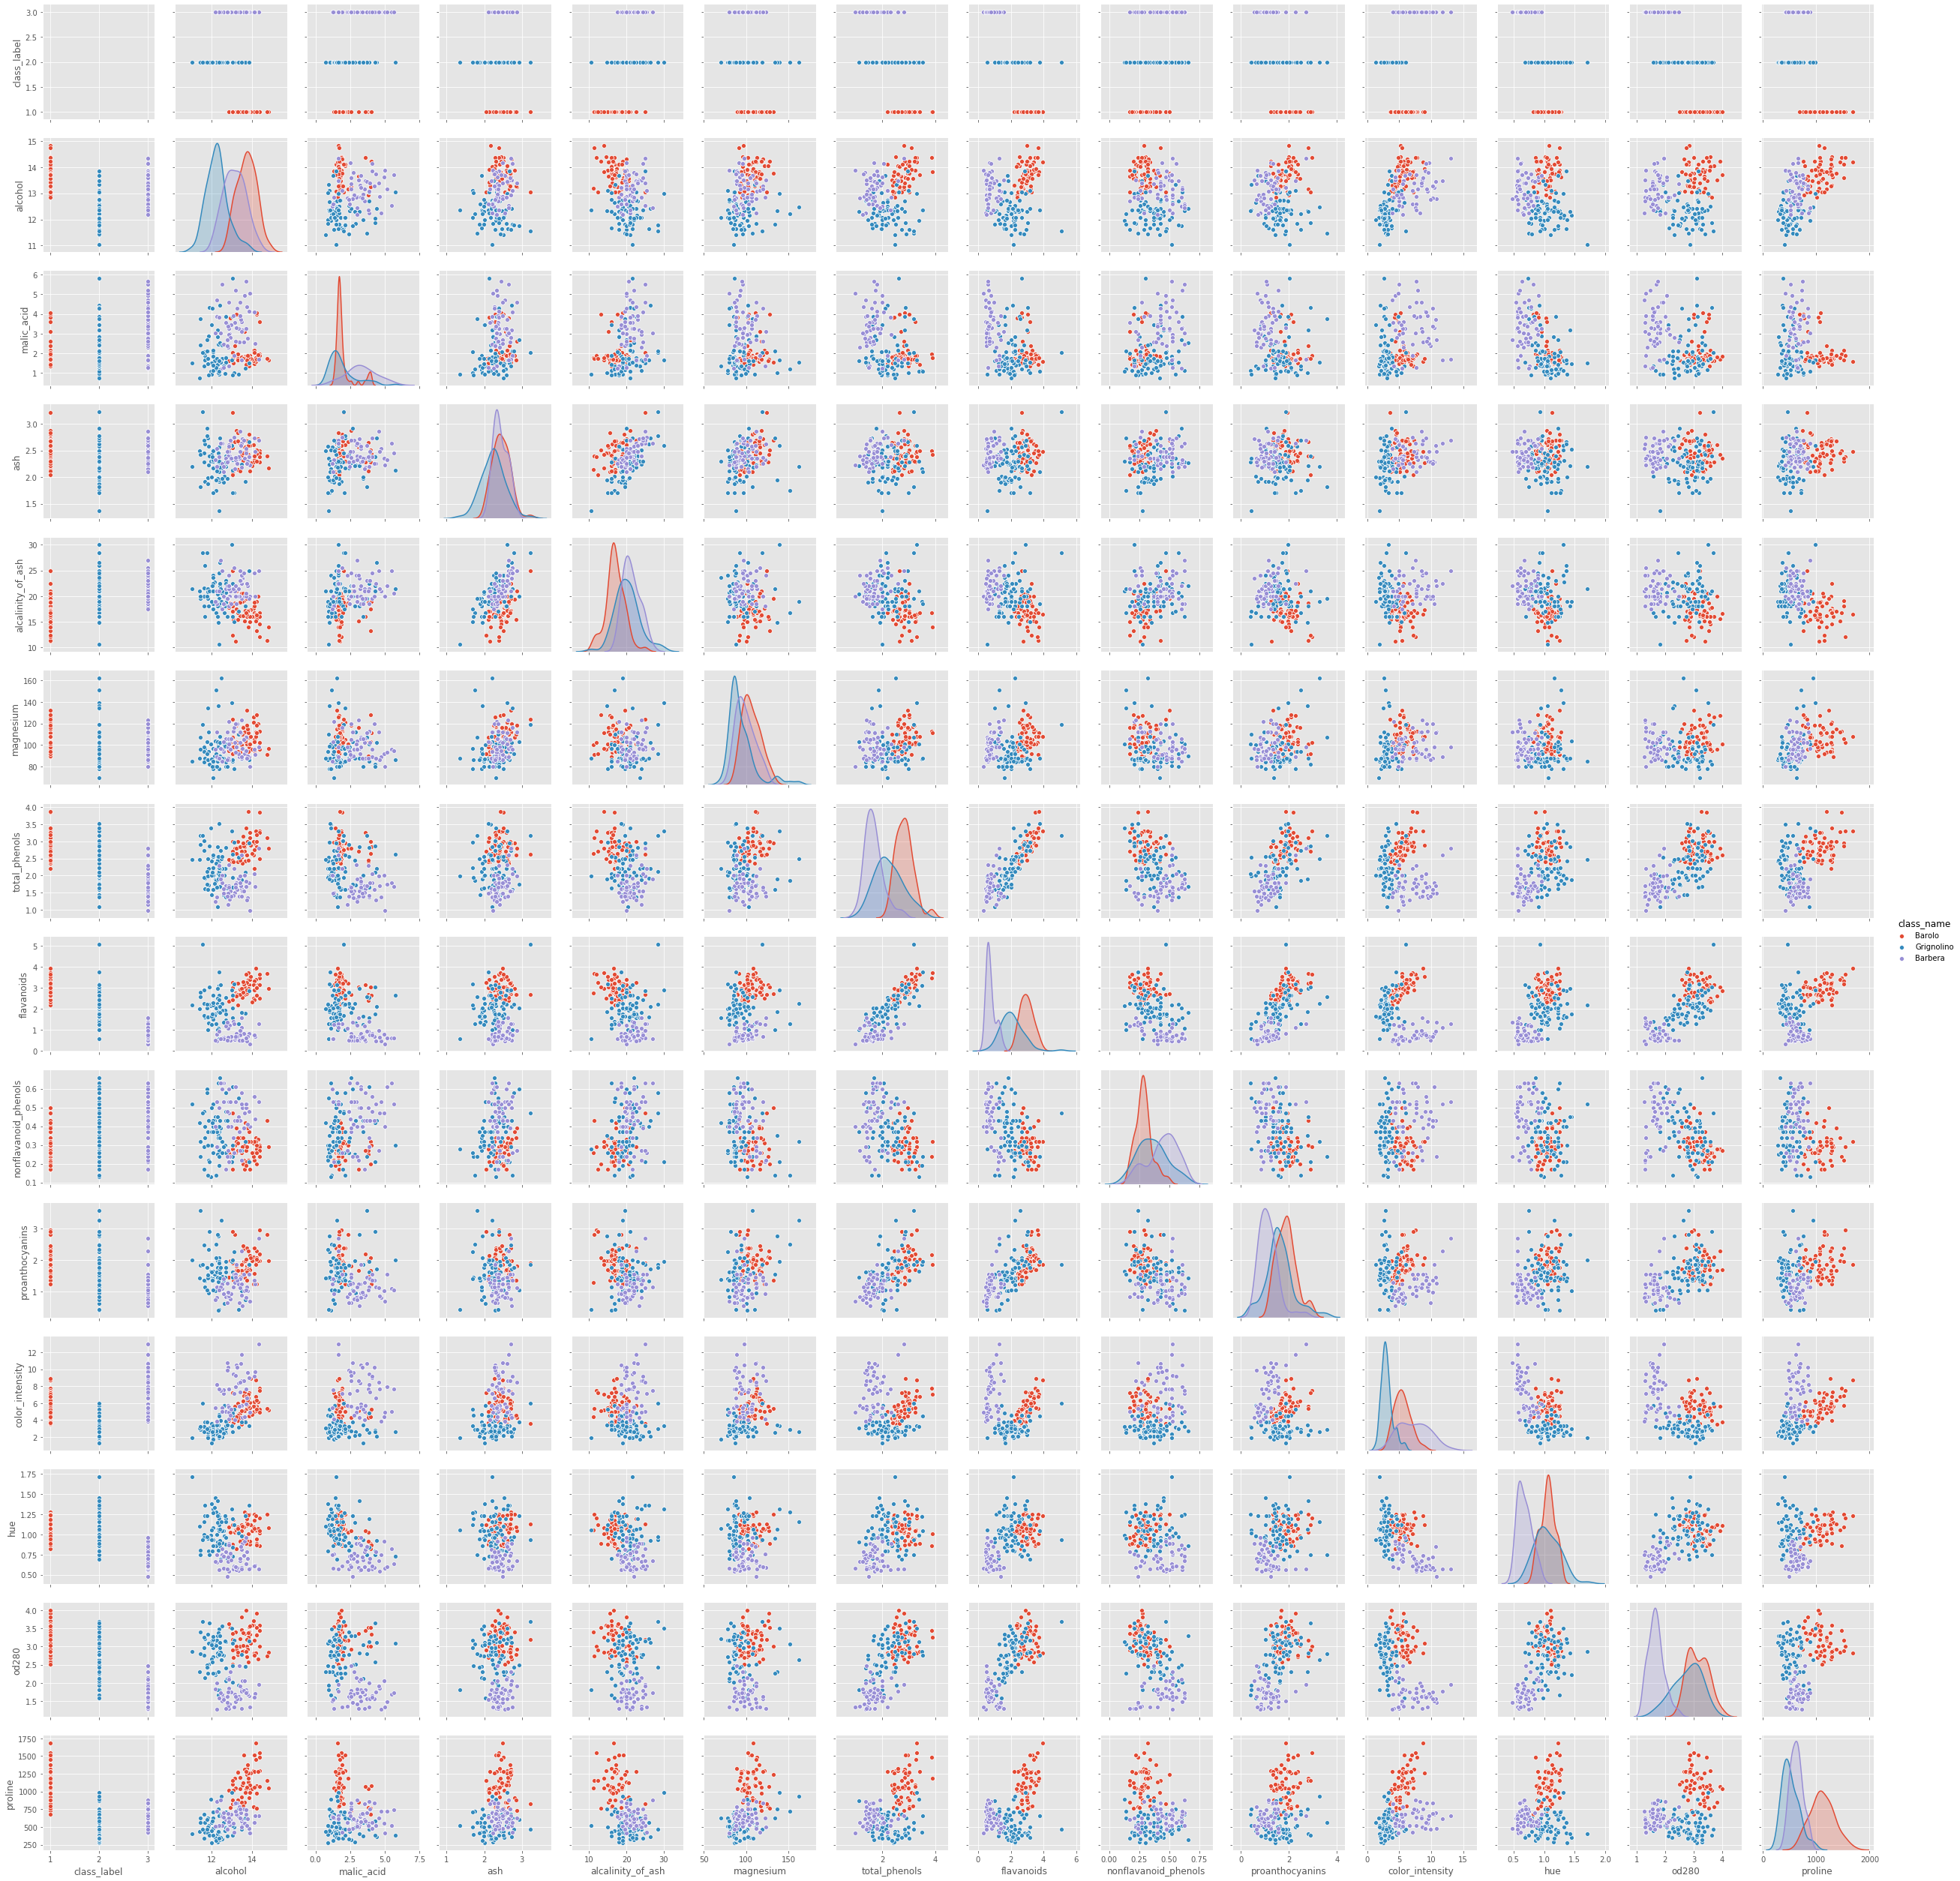

In [12]:
# create pairplots of all numeric factors in the dataset 
# hue is based on approval status 
sns.pairplot(df, hue="class_name")

## Feature variances

The variance of a feature measures its spread of values. 

In [13]:
xs = df["od280"]
ys = df["malic_acid"]

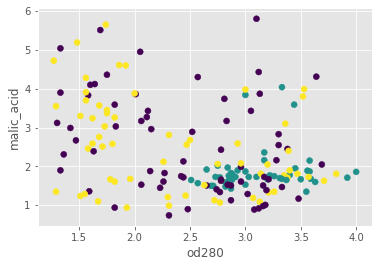

In [14]:
# color by cluster label 
plt.scatter(xs, ys, c=labels)
plt.xlabel("od280")
plt.ylabel("malic_acid")
plt.show()

In [15]:
df.var()

class_label                 0.600679
alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

We can see that the wine features have very different variances. 

In [16]:
xs = df["od280"]
ys = df["proline"]

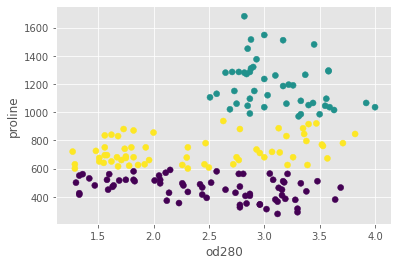

In [17]:
# color by cluster label 
plt.scatter(xs, ys, c=labels)
plt.xlabel("od280")
plt.ylabel("proline")
plt.show()

## StandardScaler
In KMeans Clustering, feature variance=feature influence. 
+ StandardScaler transforms each feature to have mean 0 and variance 1. 
+ Features are said to be standardized. 

In [18]:
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(X)

## StandardScaler then KMeans Pipeline

In [21]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(X)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [22]:
labels = pipeline.predict(X)

In [23]:
label_df = pd.DataFrame({'labels': labels, 'varieties': varieties})
label_df.head()

,labels,varieties
0,2,Barolo
1,2,Barolo
2,2,Barolo
3,2,Barolo
4,2,Barolo


## Feature Standardization improves clustering 

In [24]:
ct = pd.crosstab(label_df['labels'], label_df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1               48       0           3
2                0      59           3


Without feature standardization, wine variety did not match the label. After standardization, the correspondence between varieties and labels is fantastic. The labels correspond almost exactly to the three wine varieties.  

StandardScaler is a preprocessing step. MaxAbsScaler and Normalizer are other examples. 